In [3]:
import numpy as np
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import feather
from sklearn.metrics import roc_curve, auc

In [8]:
patient = "JE"
results = feather.read_dataframe(r'../data/all_patients_no_cross_auto_ts_test_day_acausal4.feather')
predictions_multi = results[(results['patient']==patient) & 
                         (results['cov_choice']=='phase_multi')]['preds_test'].to_numpy()[2:]
seizures = results[(results['patient']==patient) & (results['cov_choice']=='phase_multi')]['test_Sz'].to_numpy()[2:].astype('int')

In [11]:
fpr_multi, tpr_multi, thresholds_keras = roc_curve(seizures, predictions_multi)
auroc_multi = auc(fpr_multi, tpr_multi)

In [16]:
nsurro = 100
fpr_surros, tpr_surros, auc_surros = [], [], []
for i in range(nsurro):
    fpr_multi_su, tpr_multi_su, thresholds_keras = roc_curve(seizures, np.random.permutation(predictions_multi))
    fpr_surros.append(fpr_multi_su)
    tpr_surros.append(tpr_multi_su)
    auc_surros.append(auc(fpr_multi_su, tpr_multi_su))

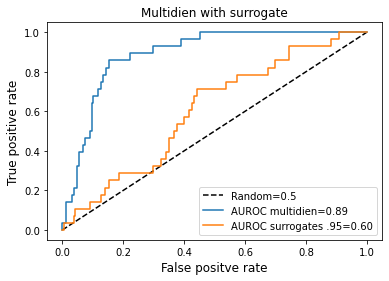

In [20]:
auc_95 = np.percentile(auc_surros, 95)
idx_95 = (np.abs(auc_surros - auc_95)).argmin()

plt.figure()
plt.title('Multidien with surrogate')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_multi, tpr_multi)
plt.plot(fpr_surros[idx_95], tpr_surros[idx_95])
plt.xlabel('False positve rate',fontsize=12)
plt.ylabel('True positive rate',fontsize=12)
plt.legend(['Random=0.5','AUROC multidien=%0.2f' % (auroc_multi),'AUROC surrogates .95=%0.2f' % (auc_95)])
plt.savefig('AUROC_multidien_surrogate.png')